# Clustering and t-Stochastic Neighboring Embeddings #
### Import libraries, setup environment ###

In [2]:
!pip install hdbscan

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Stored in directory: C:\Users\athina\AppData\Local\pip\Cache\wheels\6a\5a\ab\a3247c72fa70b67699d5f8be94bd0c2d3d38864825d773b9f1
Successfully built hdbscan


You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
!pip install kmodes

You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import hdbscan
from kmodes.kmodes import KModes

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
pd.set_option('display.max_columns', 150)
path='C:\\usersCode\\MScDataScience\\Multimodal analysis\\Preprocessing\\'

#### Read input user data ####

In [2]:
df = pd.read_excel(path+'spotify_metadata_playlist.xlsx')
df.tail()

,acousticness,activity,age,artist_name,danceability,energy,gender,id,instrumentalness,liveness,location,loudness,mood,period,popularity,release_date,song_name,speechiness,tempo,user_id,valence
698,0.09830,commuting,40,Deep Purple,0.632,0.586,male,5SAUIWdZ04OxYfJFDchC7S,0.581000,0.0535,outdoor,-11.333,excited,midday,63.0,1972-03-25,Smoke on the Water,0.0284,114.243,9,0.890
699,0.07900,commuting,40,The Clash,0.742,0.833,male,39shmbIHICJ2Wxnk1fPSdz,0.000000,0.3840,outdoor,-6.463,excited,midday,77.0,1982,Should I Stay or Should I Go - Remastered,0.1150,113.375,9,0.816
700,0.00705,commuting,40,Motörhead,0.448,0.936,male,1s0koYJ8UkZstIYYGboZa3,0.245000,0.1280,outdoor,-6.300,excited,midday,29.0,1992-07-28,You Better Run,0.0589,135.135,9,0.536
701,0.00377,commuting,40,Motörhead,0.660,0.778,male,7BwYSuWTyfcG3vtp1SnP7n,0.000856,0.3730,outdoor,-6.163,excited,midday,44.0,1979-03-24,Louie Louie,0.0583,123.205,9,0.758
702,0.00014,commuting,40,The Gone Jackals,0.305,0.882,male,2u2hIyLXxO06AudM88TmgF,0.249000,0.3880,outdoor,-13.521,excited,midday,31.0,1995,Legacy,0.0706,125.519,9,0.477


#### Drop NaN values in Spotify metadata ####

In [19]:
df = df.dropna()
df.head()

,acousticness,activity,age,artist_name,danceability,energy,gender,id,instrumentalness,liveness,location,loudness,mood,period,popularity,release_date,song_name,speechiness,tempo,user_id,valence,age_group
0,0.1430,studying,44,Stive Morgan,0.517,0.671,female,6x4QOwELkBmymbbm3Q2gvz,0.39200,0.0974,other,-10.072,contentment,evening,19.0,2019-04-25,My Angel (Piano Theme 2019),0.0279,188.021,1,0.8620,41-50
1,0.4070,working,44,The Rasmus,0.544,0.463,female,4khu91lkXFEebpfrUs3f81,0.00000,0.0748,work,-6.832,contentment,evening,43.0,2009-11-09,October & April,0.0294,131.842,1,0.2820,41-50
2,0.6960,working,44,R Armando Morabito,0.553,0.528,female,7f7f1GcRnsa4EZ2VZ1ZcsV,0.00108,0.1040,work,-12.852,contentment,evening,33.0,2014-12-23,One More Time (feat. Malukah & Tina Guo),0.0306,143.937,1,0.0952,41-50
3,0.0375,studying,44,Hilmer Rose,0.647,0.675,female,2z5XDfumoRcIZLQL9i6YhX,0.00000,0.0732,work,-6.692,contentment,morning,7.0,2016-10-20,Let Me Love You - Reprise DJ Snake Feat Justin...,0.1170,109.930,1,0.9090,41-50
4,0.0275,studying,44,Harry Styles,0.516,0.595,female,5Ohxk2dO5COHF1krpoPigN,0.00000,0.1090,work,-4.630,contentment,morning,78.0,2017-05-12,Sign of the Times,0.0313,119.972,1,0.2220,41-50


### Visualizations of features ###

female    305
male      230
Name: gender, dtype: int64


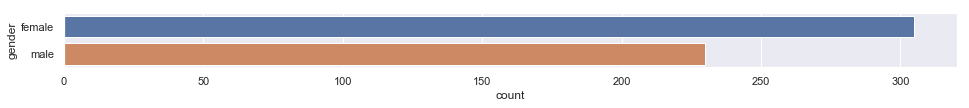

In [20]:
replace_values = {'Female': 'female'}
df = df.replace({'gender': replace_values})

print(df['gender'].value_counts())
plt.figure(figsize=(16,1))
sns.countplot(y='gender', data=df, order = df.gender.value_counts().index )

### Group ages ###

34    104
33     90
29     80
40     56
43     51
41     48
32     44
44     30
27     17
30     13
26      2
Name: age, dtype: int64


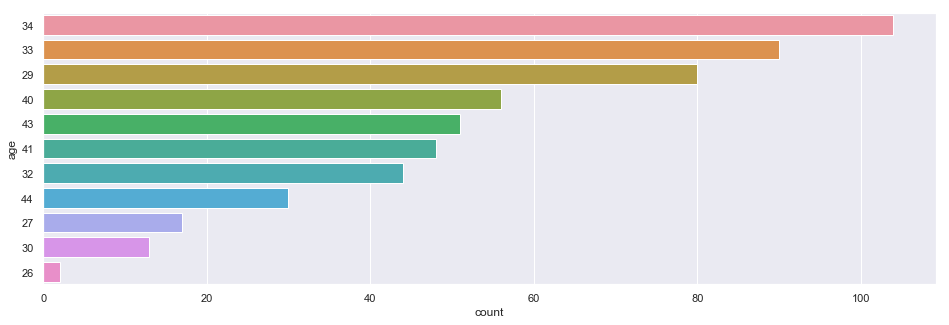

In [21]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
print(df['age'].value_counts())
plt.figure(figsize=(16,5))
sns.countplot(y='age', data=df, order = df.age.value_counts().index )

31-40    238
41-50    185
20-30    112
Name: age_group, dtype: int64


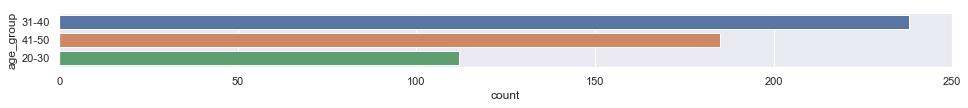

In [22]:
#grouping ages
bins = [20,31,40,50]
labels = ['20-30','31-40', '41-50']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print(df['age_group'].value_counts())
plt.figure(figsize=(16,1))
sns.countplot(y='age_group', data=df, order = df.age_group.value_counts().index )


calm        162
relaxed     136
excited      77
sad          74
pleased      50
happy        50
peaceful     44
angry        35
nervous      29
bored        29
sleepy       17
Name: mood, dtype: int64


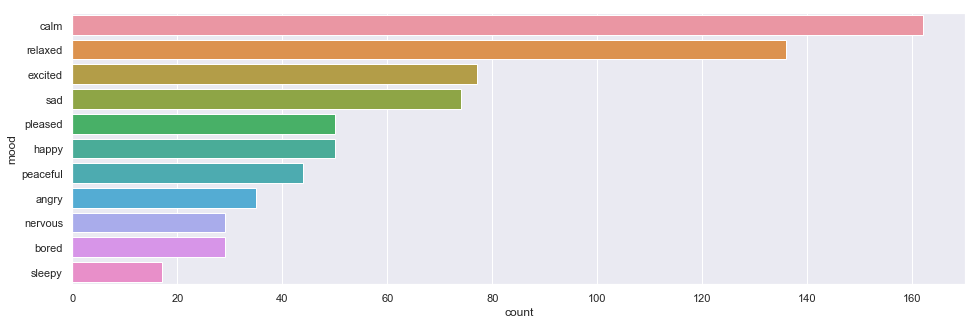

In [6]:
print(df['mood'].value_counts())
plt.figure(figsize=(16,5))
sns.countplot(y='mood', data=df, order = df.mood.value_counts().index )

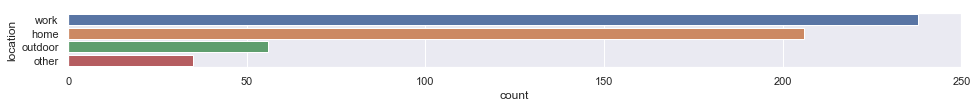

In [23]:
df['location'].value_counts()
plt.figure(figsize=(16,1))
sns.countplot(y='location', data=df, order = df.location.value_counts().index )

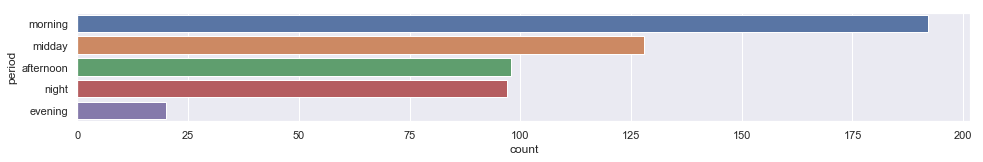

In [24]:
df['period'].value_counts()
plt.figure(figsize=(16,2))
sns.countplot(y='period', data=df, order = df.period.value_counts().index )

working        260
amusing        122
studying        82
commuting       39
working out     26
other            6
Name: activity, dtype: int64


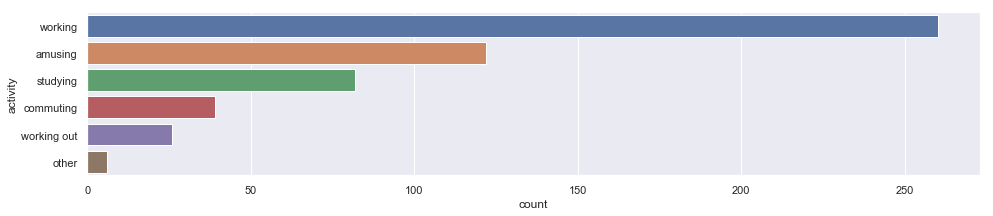

In [25]:
print(df['activity'].value_counts())
plt.figure(figsize=(16,3))
sns.countplot(y='activity', data=df, order = df.activity.value_counts().index )

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 702
Data columns (total 22 columns):
acousticness        535 non-null float64
activity            703 non-null object
age                 703 non-null int64
artist_name         701 non-null object
danceability        535 non-null float64
energy              535 non-null float64
gender              703 non-null object
id                  535 non-null object
instrumentalness    535 non-null float64
liveness            535 non-null float64
location            703 non-null object
loudness            535 non-null float64
mood                703 non-null object
period              703 non-null object
popularity          535 non-null float64
release_date        535 non-null object
song_name           701 non-null object
speechiness         535 non-null float64
tempo               535 non-null float64
user_id             703 non-null int64
valence             535 non-null float64
age_group           703 non-null category
dtype

#### Make a smaller range of emotions, mapping is done according to Russell's model ####

In [10]:
replace_values = {'pleased': 'contentment', 'relaxed': 'contentment', 'calm': 'contentment', 
                     'peaceful':'contentment', 'excited':'excitement',
                     'happy':'excitement', 'nervous':'distress', 'angry':'distress', 'annoying':'distress', 
                     'sad':'depression', 'sleepy': 'contentment', 'bored': 'depression'}
df = df.replace({'mood': replace_values})

contentment    317
excitement      98
depression      75
distress        45
Name: mood, dtype: int64


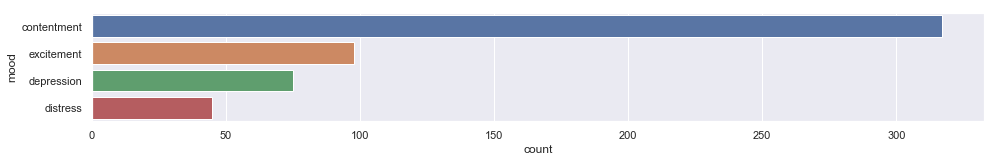

In [18]:
print(df['mood'].value_counts())
plt.figure(figsize=(16,2))
sns.countplot(y='mood', data=df, order = df.mood.value_counts().index )

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 702
Data columns (total 22 columns):
acousticness        535 non-null float64
activity            535 non-null object
age                 535 non-null int64
artist_name         535 non-null object
danceability        535 non-null float64
energy              535 non-null float64
gender              535 non-null object
id                  535 non-null object
instrumentalness    535 non-null float64
liveness            535 non-null float64
location            535 non-null object
loudness            535 non-null float64
mood                535 non-null object
period              535 non-null object
popularity          535 non-null float64
release_date        535 non-null object
song_name           535 non-null object
speechiness         535 non-null float64
tempo               535 non-null float64
user_id             535 non-null int64
valence             535 non-null float64
age_group           535 non-null category
dtype

### One-hot encoding of categorical features ###
We set *mood* as the target variable of the model, encode all categorical features and drop the following features
'artist_name', 'id', 'song_name', 'release_date' as they do no help with clustering, they have distinct values.


In [17]:
df_enc = df
df_enc = df_enc.drop('user_id', axis=1)
Y = df['mood']
the_loc = df['location']
dtime = df['period']
activ = df['activity']
artist_song = df['artist_name']+'-'+df['song_name']
age_group = df['age_group']

def encode_features(df_enc, location, activity, gender, period, age):
    #encode location
    one_hot_enc = pd.get_dummies(df_enc[location])
    df_enc = df_enc.drop('location', axis=1)
    df_enc = df_enc.join(one_hot_enc)
    #encode activity
    replace_values = {'other': 'activity_other'}
    df_enc = df_enc.replace({'activity': replace_values})
    one_hot_enc = pd.get_dummies(df_enc[activity])
    df_enc = df_enc.drop('activity', axis=1)
    df_enc = df_enc.join(one_hot_enc)
    #encode gender
    one_hot_enc = pd.get_dummies(df_enc[gender])
    df_enc = df_enc.drop('gender', axis=1)
    df_enc = df_enc.join(one_hot_enc)
    #encode age
    one_hot_enc = pd.get_dummies(df_enc[age])
    df_enc = df_enc.drop('age', axis=1)
    df_enc = df_enc.drop(age, axis=1)
    df_enc = df_enc.join(one_hot_enc)
    #encode period
    one_hot_enc = pd.get_dummies(df_enc[period])
    df_enc = df_enc.drop(period, axis=1)
    df_enc = df_enc.join(one_hot_enc) 
    
    #encode mood
    one_hot_enc = pd.get_dummies(df_enc['mood'])
    df_enc = df_enc.drop('mood', axis=1) 
    df_enc = df_enc.join(one_hot_enc)

    df_enc = df_enc.drop(['artist_name', 'id', 'song_name', 'release_date'], axis = 1)
    #df_enc = df_enc.drop(['artist_name', 'id', 'song_name', 'release_date', 'mood'], axis = 1)
    return df_enc
    
df_enc = encode_features(df_enc, 'location', 'activity', 'gender', 'period', 'age_group')
df_enc.sample(7)
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 702
Data columns (total 34 columns):
acousticness        535 non-null float64
danceability        535 non-null float64
energy              535 non-null float64
instrumentalness    535 non-null float64
liveness            535 non-null float64
loudness            535 non-null float64
popularity          535 non-null float64
speechiness         535 non-null float64
tempo               535 non-null float64
valence             535 non-null float64
home                535 non-null uint8
other               535 non-null uint8
outdoor             535 non-null uint8
work                535 non-null uint8
activity_other      535 non-null uint8
amusing             535 non-null uint8
commuting           535 non-null uint8
studying            535 non-null uint8
working             535 non-null uint8
working out         535 non-null uint8
female              535 non-null uint8
male                535 non-null uint8
20-30            

#### Plot a heatmap of correlation matrix ####

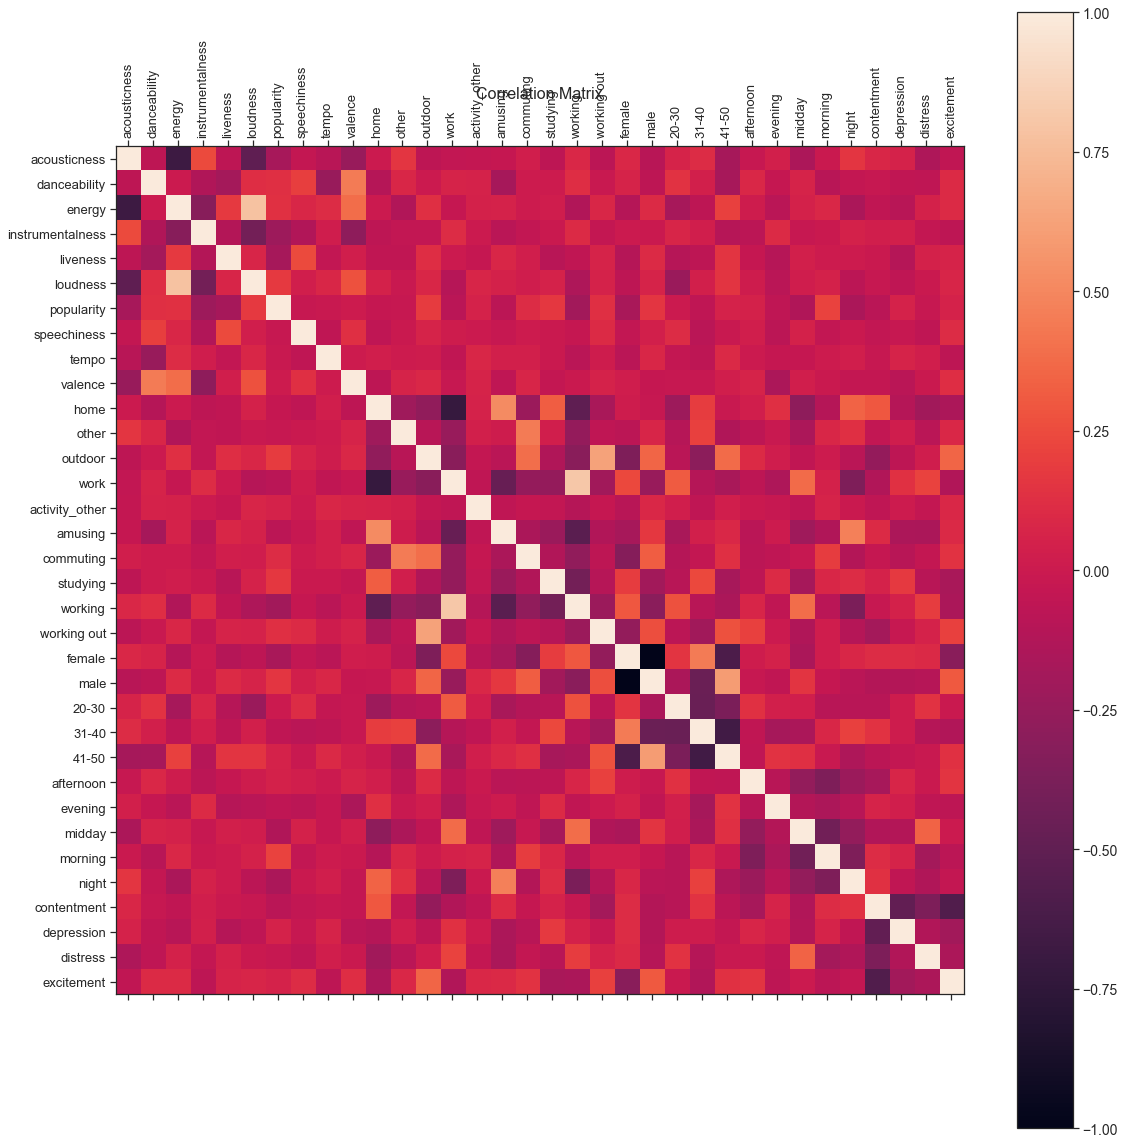

In [50]:
f = plt.figure(figsize=(19, 20))
plt.matshow(df_enc.corr(), fignum=f.number)
plt.xticks(range(df_enc.shape[1]), df_enc.columns, fontsize=13, rotation=90)
plt.yticks(range(df_enc.shape[1]), df_enc.columns, fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Scale data with MinMaxScaler or MaxAbsScaler or StandardScaler before applying clustering algorithms ###
#### MinMaxScaler in the range of [-1,1] is used ####

9


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


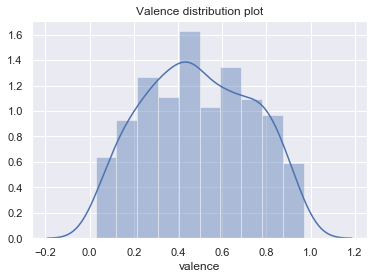

2


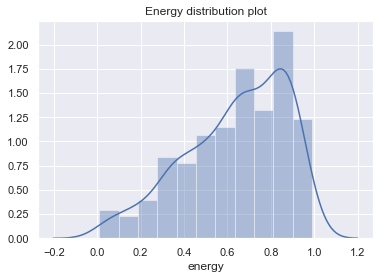

,20-30,31-40,41-50
278,0,1,0
270,0,1,0
449,1,0,0
660,0,0,1
311,0,1,0
137,0,0,1
322,0,1,0


In [33]:
print(df_enc.columns.get_loc('valence'))

ax = sns.distplot(df_enc['valence']).set(title = 'Valence distribution plot')  #9:valence
plt.show()
print(df_enc.columns.get_loc('energy'))
ax = sns.distplot(df_enc['energy']).set(title = 'Energy distribution plot')  #9:energy 
plt.show()
df_enc_min = df_enc[['20-30','31-40','41-50']]
df_enc_min.sample(7)

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1)).fit(df_enc)
d_scaled = scaler.transform(df_enc)
print(d_scaled.min(), d_scaled.max(), d_scaled.shape)

-1.0 1.0000000000000002 (535, 34)


#### MaxAbsScaler ####
works in a very similar fashion, but scales in a way that the training data lies within the range [-1, 1] by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.

In [34]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler().fit(df_enc)
d_scaled = scaler.transform(df_enc)
print(d_scaled.min(), d_scaled.max())

-1.0 1.0


#### StandardScaler ####

In [36]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_enc)
d_scaled = scaler.transform(df_enc)
print(d_scaled.min(), d_scaled.max())

-4.712498078397968 9.38971068066885


### k-Means ###
#### Apply K-means and find optimum number of clusters using silhouette score####

In [39]:
sum_of_square_distances = []
K = range(2,15)

for num_clusters in K:
    clusterer = KMeans(init = 'k-means++', n_clusters=num_clusters, n_jobs=4)
    clusterer = clusterer.fit(d_scaled)
    #preds = clusterer.fit_predict(d_scaled)
    preds = clusterer.predict(d_scaled)
    # centers = clusterer.cluster_centers_
    sum_of_square_distances.append(clusterer.inertia_)
    score = silhouette_score (d_scaled, preds)
    #vscore = v_measure_score (d_scaled, preds)
    print ("For n_clusters = {}, num_points = {}, Kmeans silhouette score is {})".format(num_clusters, Counter(clusterer.labels_), score))

For n_clusters = 2, num_points = Counter({1: 272, 0: 263}), Kmeans silhouette score is 0.11135918190744672)
For n_clusters = 3, num_points = Counter({0: 242, 1: 215, 2: 78}), Kmeans silhouette score is 0.12501905957770695)
For n_clusters = 4, num_points = Counter({2: 260, 3: 116, 0: 103, 1: 56}), Kmeans silhouette score is 0.140585644028307)
For n_clusters = 5, num_points = Counter({2: 199, 0: 170, 3: 77, 4: 54, 1: 35}), Kmeans silhouette score is 0.13950881583671876)
For n_clusters = 6, num_points = Counter({1: 146, 3: 120, 0: 94, 4: 70, 5: 54, 2: 51}), Kmeans silhouette score is 0.1269031200879028)
For n_clusters = 7, num_points = Counter({2: 147, 5: 124, 1: 76, 0: 72, 4: 51, 6: 39, 3: 26}), Kmeans silhouette score is 0.14492095120036128)
For n_clusters = 8, num_points = Counter({3: 119, 1: 109, 4: 73, 0: 67, 5: 54, 6: 48, 2: 36, 7: 29}), Kmeans silhouette score is 0.15593327652426647)
For n_clusters = 9, num_points = Counter({4: 101, 5: 100, 0: 86, 1: 72, 2: 70, 7: 54, 3: 27, 8: 19,

### Elbow method ### 

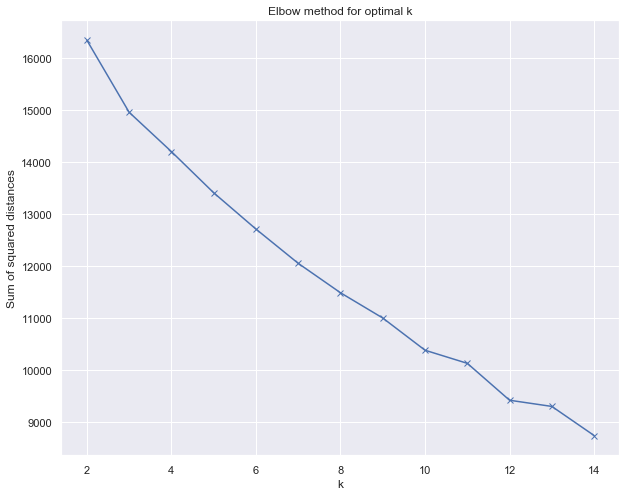

In [41]:
plt.figure(figsize=(10,8))
plt.plot(K, sum_of_square_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal k')
plt.show()

In [65]:
kmeans = KMeans(init = 'k-means++' ,n_clusters=12, random_state=2020).fit(d_scaled)
clusters_kmeans = kmeans.labels_
print(Counter(clusters_kmeans))
print(clusters_kmeans.shape)
#assign clusters to the original dataset
df['clusters_kmeans'] = clusters_kmeans
#save
df.to_excel(path+'spotify_metadata_playlist_clu.xlsx')

Counter({1: 92, 5: 68, 3: 54, 0: 53, 4: 50, 8: 44, 7: 44, 6: 36, 9: 34, 11: 22, 2: 21, 10: 17})
(535,)


### k-Modes ###

In [66]:
km = KModes(n_clusters=12, init='Huang', n_init=5, verbose=1).fit(d_scaled)

clusters_kmodes = km.labels_ 
print(Counter(clusters_kmodes))
# Print the cluster centroids
#print(km.cluster_centroids_)
df['clusters_kmodes'] = clusters_kmodes
#save
df.to_excel(path+'spotify_metadata_playlist_clu.xlsx')

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 110, cost: 6151.0
Run 1, iteration: 2/100, moves: 19, cost: 6143.0
Run 1, iteration: 3/100, moves: 1, cost: 6143.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 84, cost: 6091.0
Run 2, iteration: 2/100, moves: 32, cost: 6071.0
Run 2, iteration: 3/100, moves: 1, cost: 6071.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 106, cost: 6195.0
Run 3, iteration: 2/100, moves: 19, cost: 6195.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 128, cost: 6185.0
Run 4, iteration: 2/100, moves: 8, cost: 6178.0
Run 4, iteration: 3/100, moves: 0, cost: 6178.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 159, cost: 5997.0
Run 5, itera

### DBSCAN or HDBSCAN###
#### with scaled data because t-SNE relies on neighborhoods ####

12


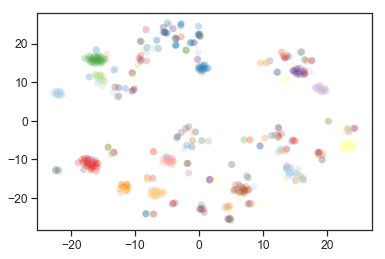

In [67]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True)
clusterer.fit(d_scaled)
print(clusterer.labels_.max())
clusters_hdbscan = clusterer.labels_
df['clusters_hdbscan'] = clusters_hdbscan
#save
df.to_excel(path+'spotify_metadata_playlist_clu.xlsx')

soft_clusters = hdbscan.all_points_membership_vectors(clusterer)
color_palette = sns.color_palette('Paired', 25)
cluster_colors = [color_palette[np.argmax(x)] for x in soft_clusters]
projection = TSNE().fit_transform(d_scaled)

plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)

#### Find optimal epsilon ####
#### The optimal value for epsilon will be found at the point of maximum curvature (applies only to DBSCAN). ####

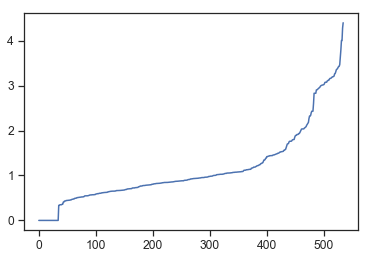

In [73]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(d_scaled)
distances, indices = nbrs.kneighbors(d_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [72]:
# to be completed
from sklearn.cluster import DBSCAN

db_clu = DBSCAN(eps=2.6, min_samples=15).fit(d_scaled)
clusters_dbscan = db_clu.labels_
df['clusters_dbscan'] = clusters_dbscan
#save
df.to_excel(path+'spotify_metadata_playlist_clu.xlsx')

#number of clusters
n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_noise = list(clusters_dbscan).count(-1)

print('Estimated number of clusters:', n_clusters)
print('Estimated number of noise points:', n_noise)
df_enc.head(10)


Estimated number of clusters: 12
Estimated number of noise points: 308


,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,home,other,outdoor,work,activity_other,amusing,commuting,studying,working,working out,female,male,20-30,31-40,41-50,afternoon,evening,midday,morning,night,contentment,depression,distress,excitement
0,0.1430,0.517,0.671,0.39200,0.0974,-10.072,19.0,0.0279,188.021,0.8620,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
1,0.4070,0.544,0.463,0.00000,0.0748,-6.832,43.0,0.0294,131.842,0.2820,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
2,0.6960,0.553,0.528,0.00108,0.1040,-12.852,33.0,0.0306,143.937,0.0952,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
3,0.0375,0.647,0.675,0.00000,0.0732,-6.692,7.0,0.1170,109.930,0.9090,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
4,0.0275,0.516,0.595,0.00000,0.1090,-4.630,78.0,0.0313,119.972,0.2220,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
5,0.1420,0.459,0.545,0.00000,0.1050,-4.874,60.0,0.0282,137.941,0.1940,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
6,0.1230,0.478,0.633,0.00000,0.4100,-6.190,67.0,0.0345,89.909,0.2870,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
7,0.0641,0.645,0.787,0.51300,0.3410,-4.707,54.0,0.0274,84.116,0.9060,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
8,0.1430,0.517,0.671,0.39200,0.0974,-10.072,19.0,0.0279,188.021,0.8620,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
9,0.2870,0.441,0.664,0.00001,0.1410,-8.958,31.0,0.0424,132.136,0.2010,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0


### Apply t-SNE on clustered data ###
#### k-means was used ####

In [74]:
x_embedded = TSNE(n_components=2, learning_rate=100).fit_transform(d_scaled)
print(x_embedded.shape)
df_plot = pd.DataFrame()
df_plot['dim_1']  = x_embedded[:,0]
df_plot['dim_2']  = x_embedded[:,1]

df_plot['Mood'] = Y
df_plot['Location'] = the_loc
df_plot['Period'] = dtime
df_plot['Activity'] = activ
df_plot['Artist_Song'] = artist_song
df_plot['clusters_kmeans'] = clusters_kmeans
df_plot['clusters_kmodes'] = clusters_kmodes
df_plot['clusters_hdbscan'] = clusters_hdbscan
df_plot['clusters_dbscan'] = clusters_dbscan

df_plot.head()

(535, 2)


,dim_1,dim_2,Mood,Location,Period,Activity,Artist_Song,clusters_kmeans,clusters_kmodes,clusters_hdbscan,clusters_dbscan
0,-4.526399,0.811144,contentment,other,evening,studying,Stive Morgan-My Angel (Piano Theme 2019),0,3,-1,-1
1,-0.968610,3.926728,contentment,work,evening,working,The Rasmus-October & April,1,3,-1,-1
2,-0.952510,3.941043,contentment,work,evening,working,R Armando Morabito-One More Time (feat. Maluka...,1,3,-1,-1
3,-0.936417,10.279016,contentment,work,morning,studying,Hilmer Rose-Let Me Love You - Reprise DJ Snake...,1,0,-1,-1
4,-0.948101,10.283404,contentment,work,morning,studying,Harry Styles-Sign of the Times,1,0,-1,-1


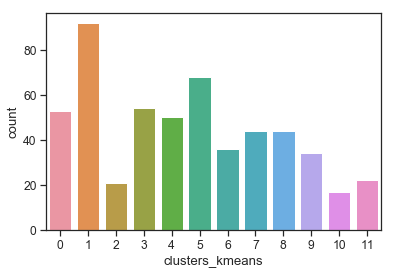

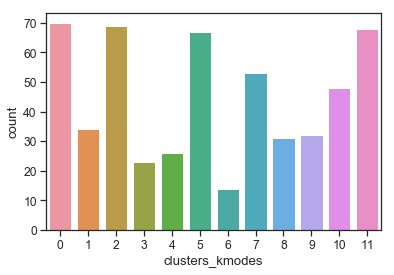

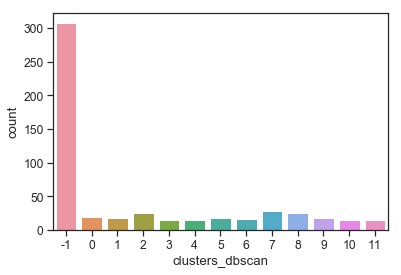

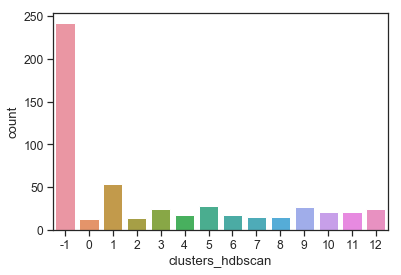

In [75]:
sns.countplot(df_plot['clusters_kmeans'])
plt.show()
sns.countplot(df_plot['clusters_kmodes'])
plt.show()
sns.countplot(df_plot['clusters_dbscan'])
plt.show()
sns.countplot(df_plot['clusters_hdbscan'])

In [87]:
df_plot.corr(method='kendall')

,dim_1,dim_2,clusters_kmeans,clusters_kmodes,clusters_hbdscan,clusters_dbscan
dim_1,1.000000,0.052501,0.051757,-0.003188,-0.127006,0.045173
dim_2,0.052501,1.000000,0.223423,-0.240830,-0.019417,-0.152090
clusters_kmeans,0.051757,0.223423,1.000000,0.104625,-0.086392,0.011370
clusters_kmodes,-0.003188,-0.240830,0.104625,1.000000,0.060850,0.092845
clusters_hbdscan,-0.127006,-0.019417,-0.086392,0.060850,1.000000,0.507073
clusters_dbscan,0.045173,-0.152090,0.011370,0.092845,0.507073,1.000000


### The best clustering algorithm selected based on subjective criteria ###

In [81]:
import pickle
#selected_method = 'clusters_kmeans'
selected_method = 'clusters_kmodes'

# save the best models to disk
filename = 'finalized_model_kmeans.sav'
pickle.dump(kmeans, open(path+filename, 'wb'))

filename = 'finalized_model_kmode.sav'
pickle.dump(km, open(path+filename, 'wb'))

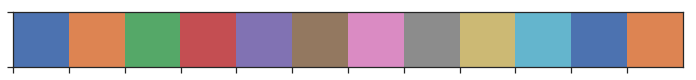

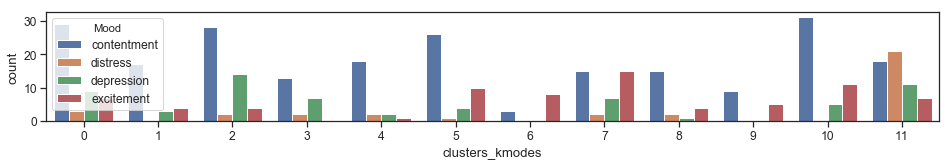

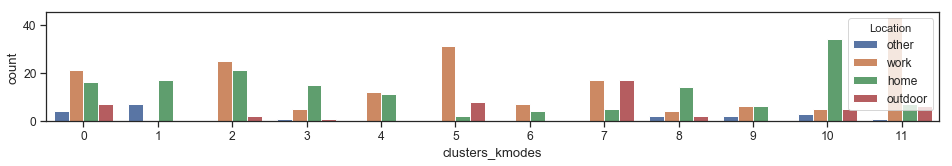

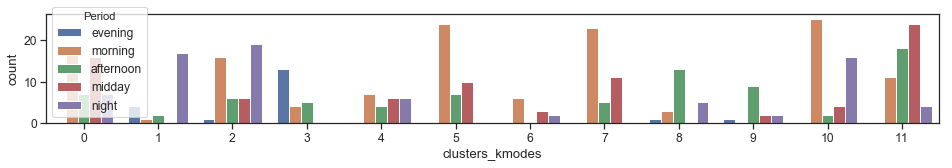

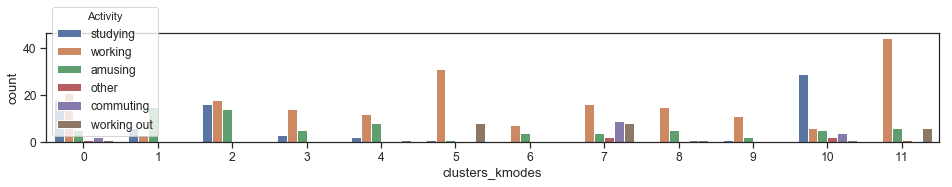

In [85]:
mpalette = sns.palplot(sns.color_palette('deep', 12))
plt.figure(figsize=(16,2))
ax = sns.countplot(x=selected_method, hue="Mood", data=df_plot, palette= mpalette)
plt.show()
plt.figure(figsize=(16,2))
ax = sns.countplot(x=selected_method, hue="Location", data=df_plot, palette= mpalette)
plt.show()
plt.figure(figsize=(16,2))
ax = sns.countplot(x=selected_method, hue="Period", data=df_plot, palette= mpalette)
plt.show()
plt.figure(figsize=(16,2))
ax = sns.countplot(x=selected_method, hue="Activity", data=df_plot, palette= mpalette)
plt.show()

### Plot Clusters ###

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


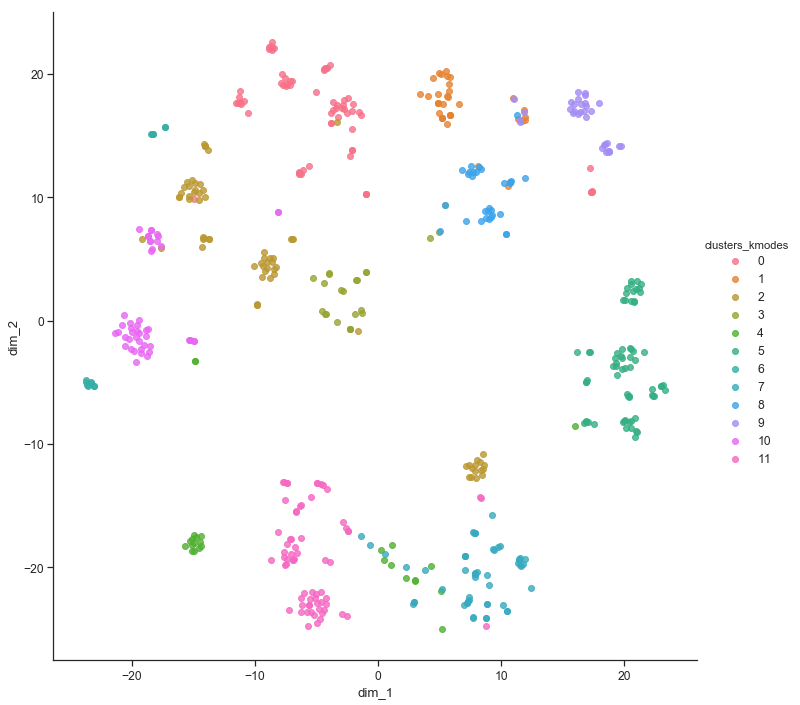

In [78]:
sns.set_context('notebook', font_scale = 1.1)
sns.set_style('ticks')

sns.lmplot(x='dim_1',
          y='dim_2',
          data = df_plot,
          fit_reg = False,
          legend = True,
          size = 10,
          hue = selected_method )

plt.savefig('digits_kmeans-generated_18_cluster.png', dpi=120)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


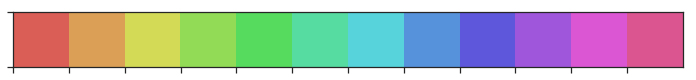

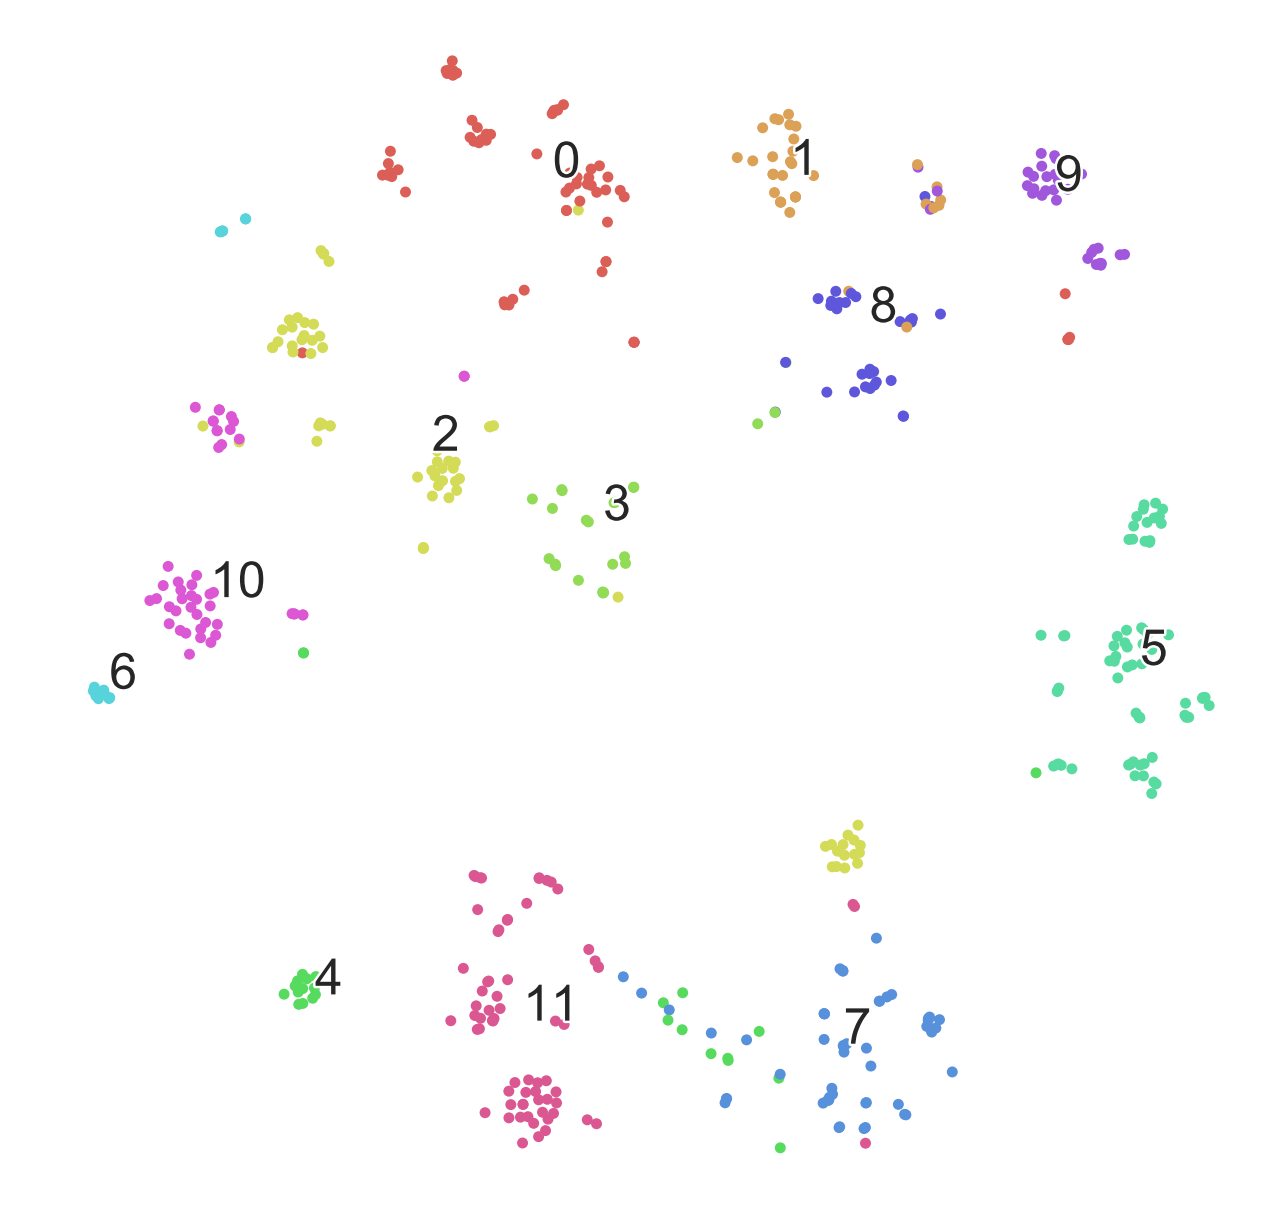

In [79]:
import matplotlib.patheffects as PathEffects

n_clusters=12
# An user defined function to create scatter plot of vectors
def scatter(x, colors):
    n_clusters=12
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", n_clusters))

    # We create a scatter plot.
    f = plt.figure(figsize=(22, 22))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=120,
                    c=palette[colors.astype(np.int)])
    
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each cluster.
    txts = []
    for i in range(n_clusters):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=50)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


print(list(range(0,n_clusters)))
sns.palplot(np.array(sns.color_palette("hls", n_clusters)))
scatter(x_embedded, clusters_kmodes)
plt.savefig('digits_tsne-generated_18_cluster.png', dpi=120)

### Statistics on Clusters ###

Analysis of cluster 0
Number of items: 53
Cluster characteristics of 0: Gender: female Age group:31-40, Location:home, Activity:studying, When:morning, Mood:contentment
Spotify characteristics: Accousticness:4.52e-05-0.786, Danceability:0.222-0.798, Energy:0.307-0.967, Loudness:-14.192--2.578, Tempo:72.637-197.705, Valence:0.0948-0.89, Instrumentalness:0.0-0.891


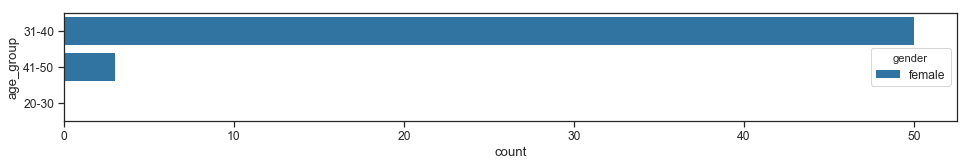

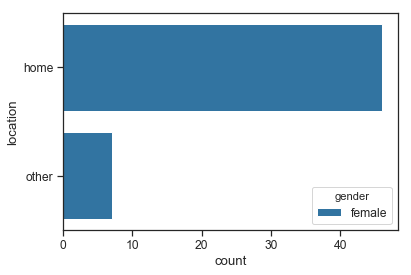

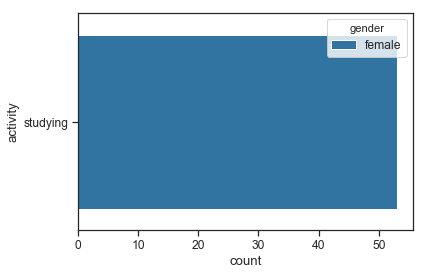

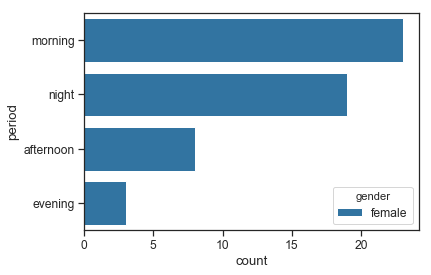

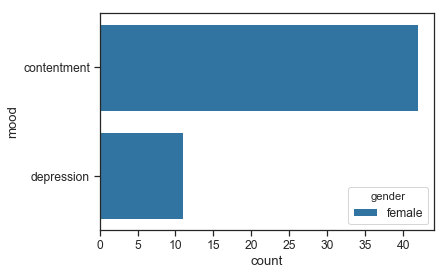

Analysis of cluster 1
Number of items: 92
Cluster characteristics of 1: Gender: female Age group:31-40, Location:work, Activity:working, When:morning, Mood:contentment
Spotify characteristics: Accousticness:4.52e-05-0.995, Danceability:0.144-0.837, Energy:0.00894-0.975, Loudness:-25.377--2.578, Tempo:56.3-201.448, Valence:0.0348-0.959, Instrumentalness:0.0-0.961


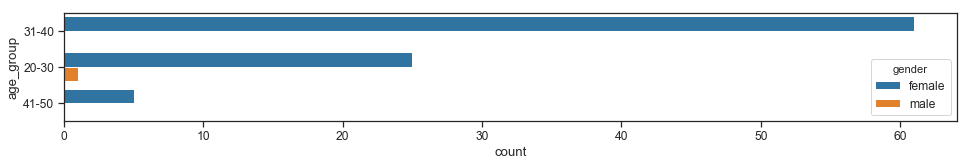

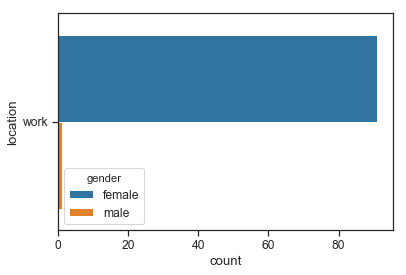

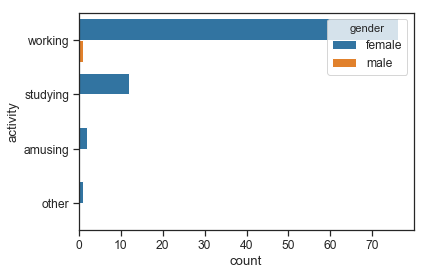

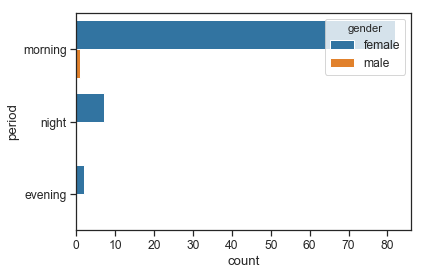

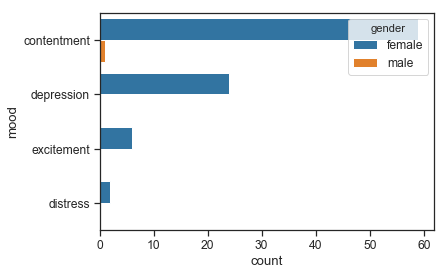

Analysis of cluster 2
Number of items: 21
Cluster characteristics of 2: Gender: male Age group:20-30, Location:home, Activity:studying, When:night, Mood:contentment
Spotify characteristics: Accousticness:0.00109-0.995, Danceability:0.137-0.84, Energy:0.0272-0.922, Loudness:-29.648--3.279, Tempo:65.568-173.737, Valence:0.0269-0.884, Instrumentalness:0.0-0.943


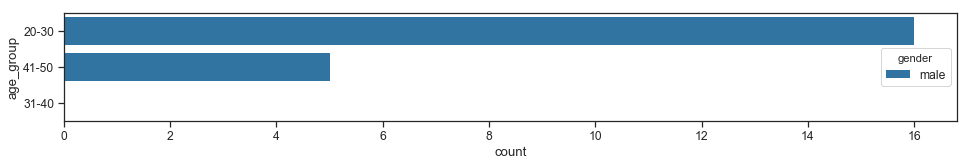

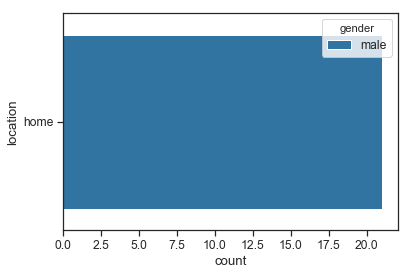

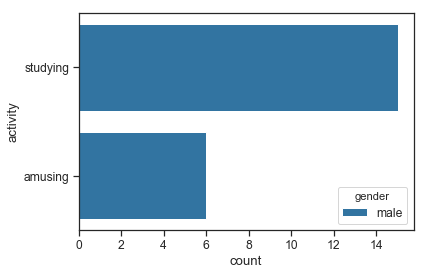

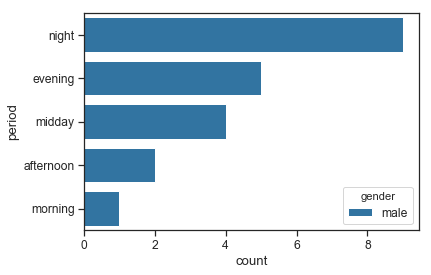

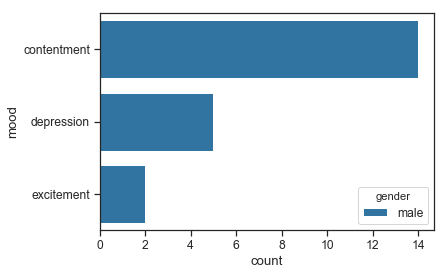

Analysis of cluster 3
Number of items: 54
Cluster characteristics of 3: Gender: male Age group:41-50, Location:outdoor, Activity:working out, When:morning, Mood:excitement
Spotify characteristics: Accousticness:2.77e-06-0.963, Danceability:0.153-0.933, Energy:0.0686-0.99, Loudness:-23.208--2.342, Tempo:64.223-182.957, Valence:0.163-0.954, Instrumentalness:0.0-0.962


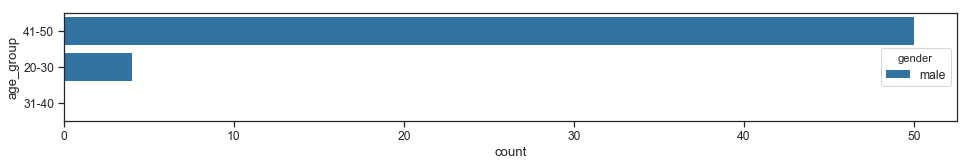

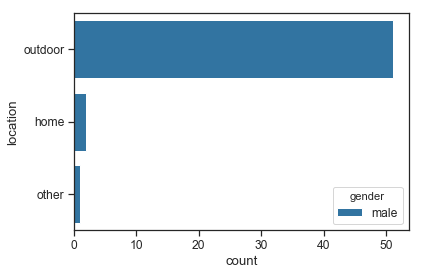

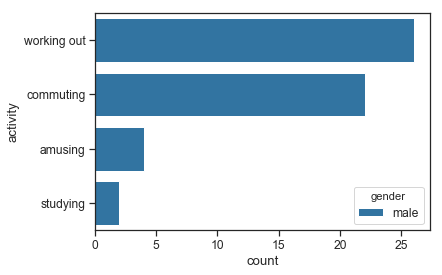

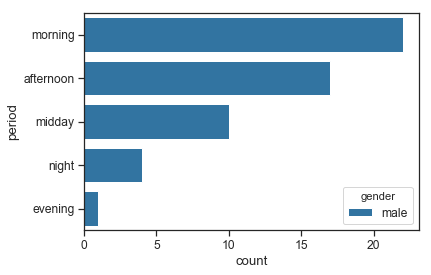

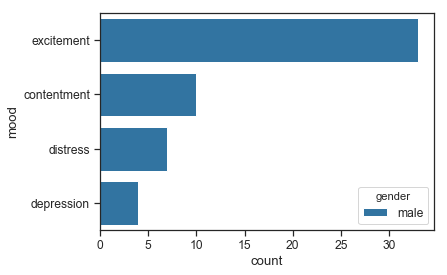

Analysis of cluster 4
Number of items: 50
Cluster characteristics of 4: Gender: male Age group:41-50, Location:home, Activity:amusing, When:morning, Mood:contentment
Spotify characteristics: Accousticness:5.36e-06-0.835, Danceability:0.112-0.806, Energy:0.0686-0.987, Loudness:-23.208--2.97, Tempo:67.026-200.024, Valence:0.0822-0.969, Instrumentalness:0.0-0.962


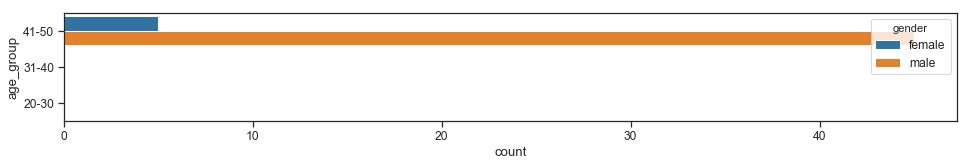

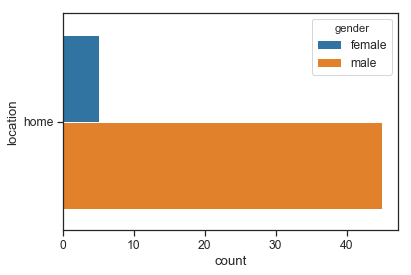

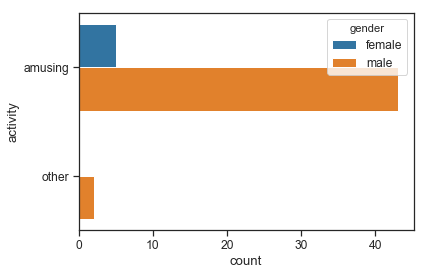

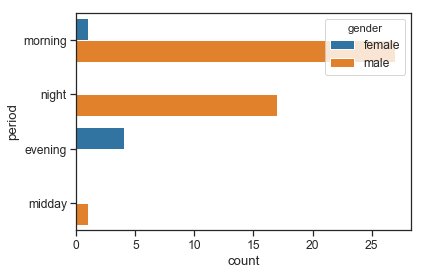

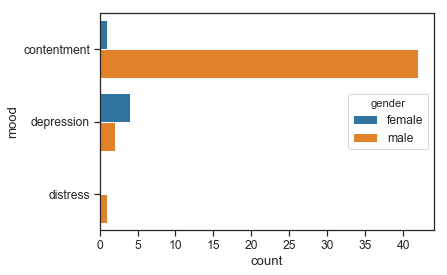

Analysis of cluster 5
Number of items: 68
Cluster characteristics of 5: Gender: male Age group:41-50, Location:work, Activity:working, When:midday, Mood:contentment
Spotify characteristics: Accousticness:0.000132-0.938, Danceability:0.252-0.952, Energy:0.134-0.965, Loudness:-17.465--1.077, Tempo:70.931-183.702, Valence:0.122-0.923, Instrumentalness:0.0-0.893


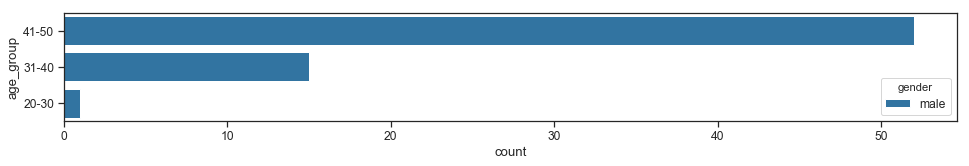

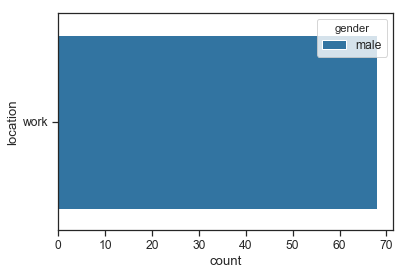

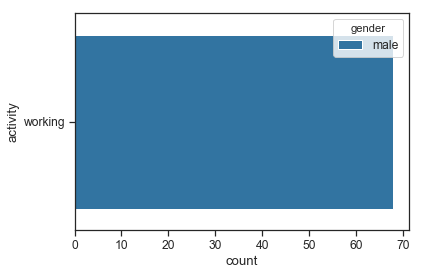

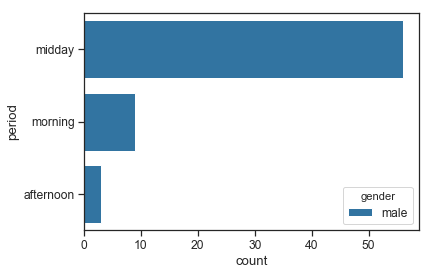

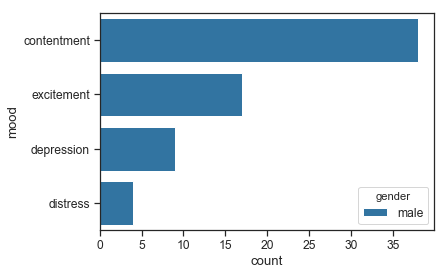

Analysis of cluster 6
Number of items: 36
Cluster characteristics of 6: Gender: female Age group:31-40, Location:home, Activity:working, When:afternoon, Mood:contentment
Spotify characteristics: Accousticness:0.000841-0.963, Danceability:0.279-0.855, Energy:0.0959-0.902, Loudness:-17.993--3.017, Tempo:75.836-189.785, Valence:0.0973-0.963, Instrumentalness:0.0-0.773


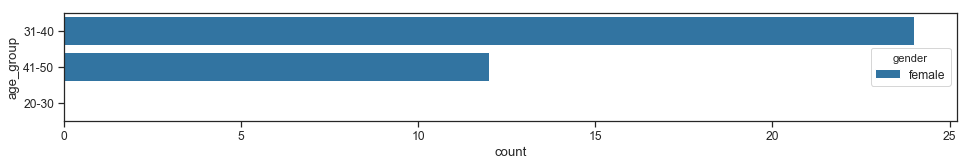

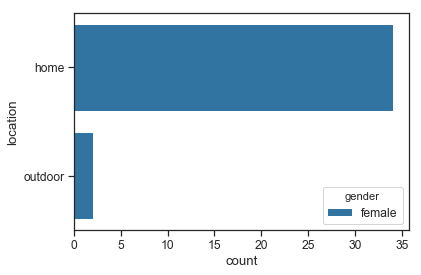

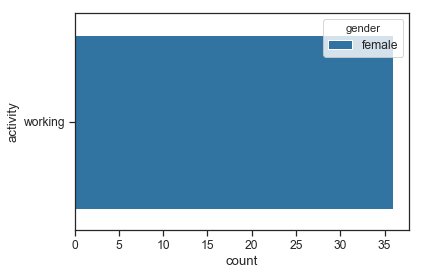

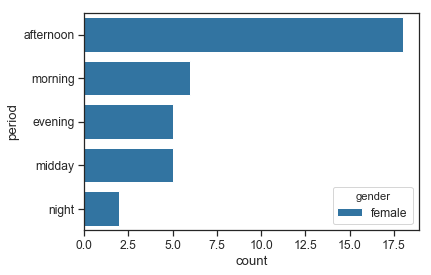

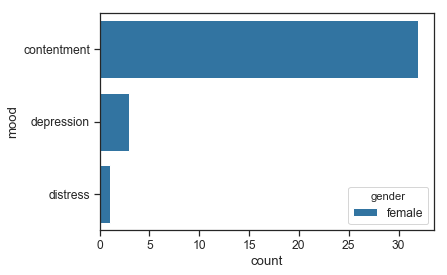

Analysis of cluster 7
Number of items: 44
Cluster characteristics of 7: Gender: female Age group:20-30, Location:work, Activity:working, When:midday, Mood:distress
Spotify characteristics: Accousticness:1.95e-05-0.936, Danceability:0.112-0.854, Energy:0.234-0.959, Loudness:-18.442--3.232, Tempo:76.947-189.507, Valence:0.0961-0.904, Instrumentalness:0.0-0.896


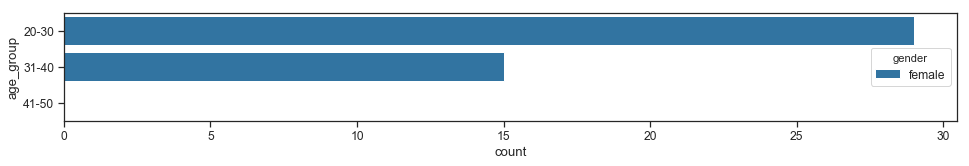

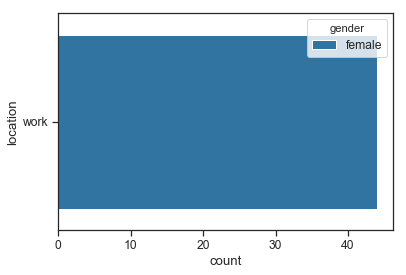

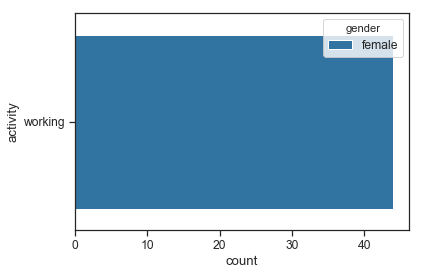

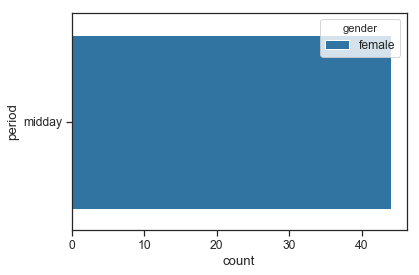

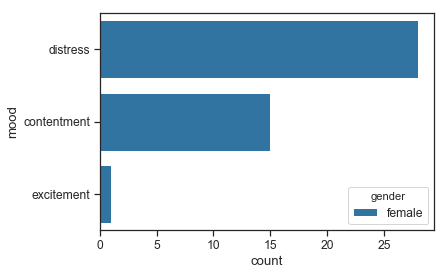

Analysis of cluster 8
Number of items: 44
Cluster characteristics of 8: Gender: female Age group:31-40, Location:home, Activity:amusing, When:night, Mood:contentment
Spotify characteristics: Accousticness:0.00286-0.889, Danceability:0.275-0.798, Energy:0.176-0.968, Loudness:-13.686--3.112, Tempo:82.205-187.312, Valence:0.136-0.941, Instrumentalness:0.0-0.865


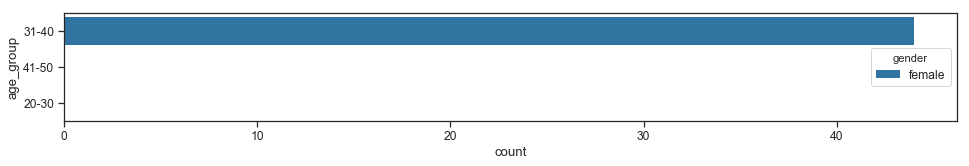

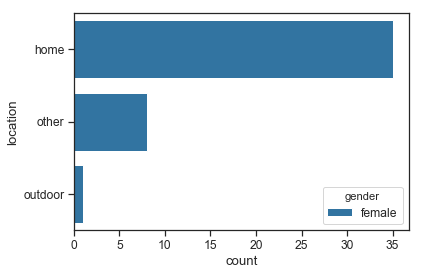

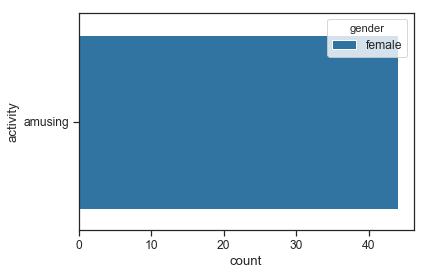

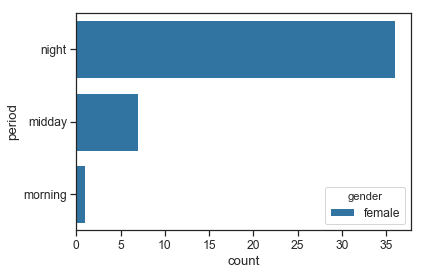

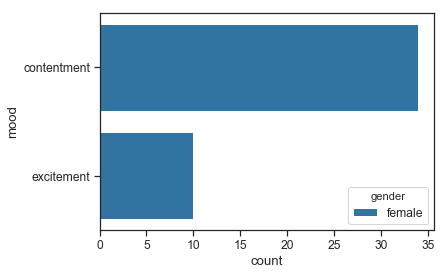

Analysis of cluster 9
Number of items: 34
Cluster characteristics of 9: Gender: female Age group:20-30, Location:work, Activity:working, When:afternoon, Mood:depression
Spotify characteristics: Accousticness:1.15e-05-0.856, Danceability:0.219-0.853, Energy:0.25-0.887, Loudness:-16.239--2.959, Tempo:73.418-208.571, Valence:0.0381-0.906, Instrumentalness:0.0-0.942


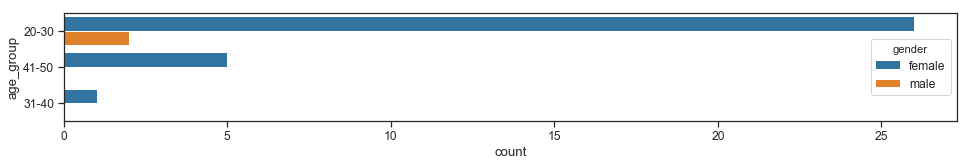

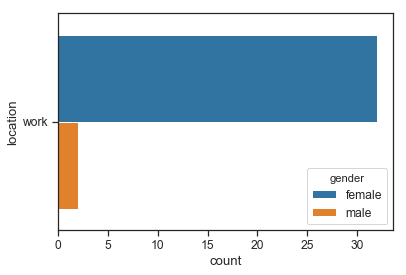

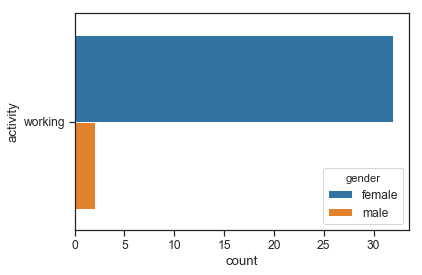

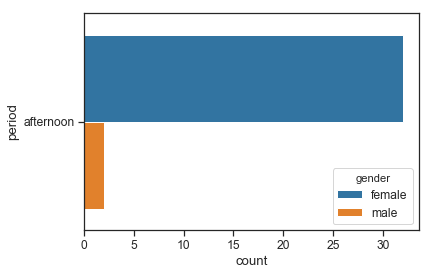

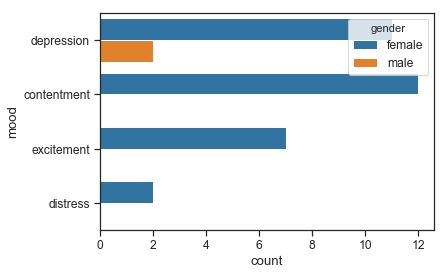

Analysis of cluster 10
Number of items: 17
Cluster characteristics of 10: Gender: male Age group:31-40, Location:other, Activity:commuting, When:morning, Mood:contentment
Spotify characteristics: Accousticness:0.0275-0.963, Danceability:0.401-0.805, Energy:0.147-0.902, Loudness:-18.097--3.017, Tempo:75.454-199.373, Valence:0.0694-0.965, Instrumentalness:0.0-0.942


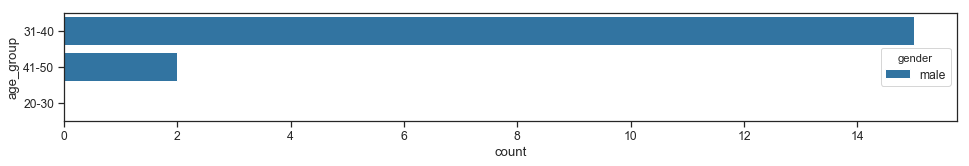

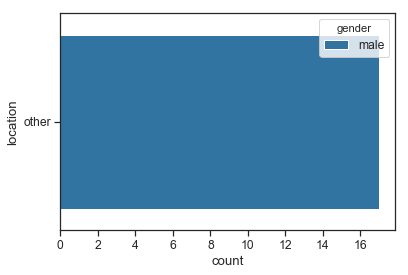

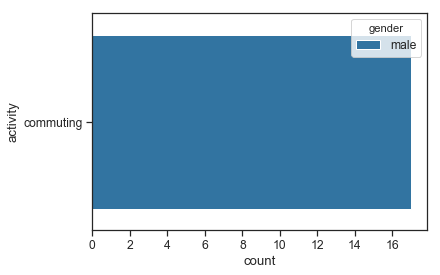

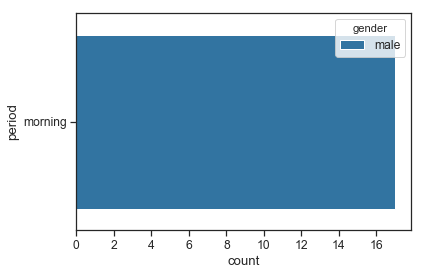

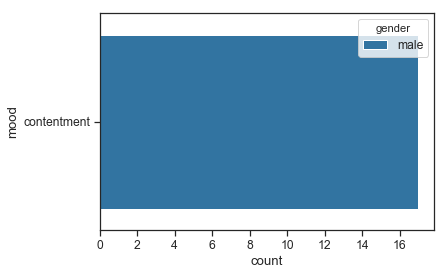

Analysis of cluster 11
Number of items: 22
Cluster characteristics of 11: Gender: male Age group:31-40, Location:home, Activity:amusing, When:afternoon, Mood:excitement
Spotify characteristics: Accousticness:4.52e-05-0.692, Danceability:0.307-0.843, Energy:0.34-0.94, Loudness:-12.051--2.214, Tempo:80.544-163.015, Valence:0.138-0.836, Instrumentalness:0.0-0.891


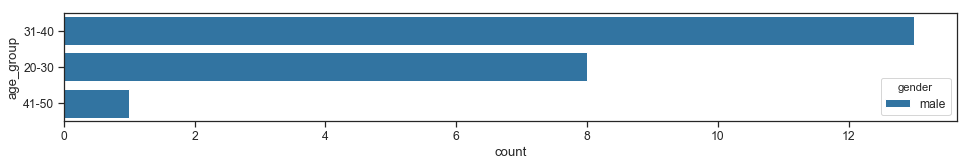

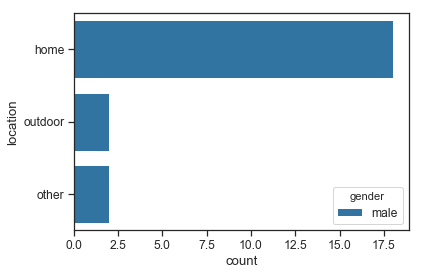

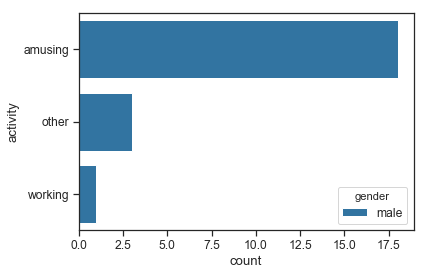

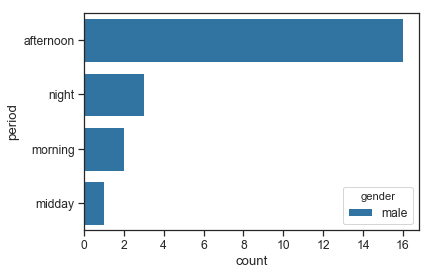

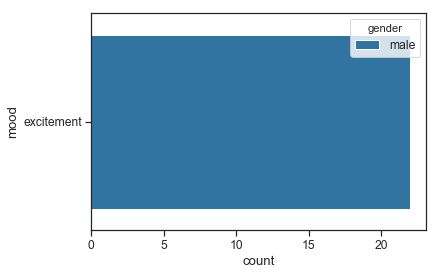

In [103]:
clusters = 12

for cluster in range(clusters):
    df_filtered = df[df[selected_method]==cluster]
    length = len(df_filtered)
    print('Analysis of cluster {}'.format(cluster) )
    print('Number of items:', length)
    print('Cluster characteristics of {}: Gender: {} Age group:{}, Location:{}, Activity:{}, When:{}, Mood:{}'.format(cluster, 
                                                                                        df_filtered['gender'].value_counts().sort_values(ascending=False).idxmax(),
                                                                                        df_filtered['age_group'].value_counts().sort_values(ascending=False).idxmax(),
                                                                                        df_filtered['location'].value_counts().sort_values(ascending=False).idxmax(),
                                                                                        df_filtered['activity'].value_counts().sort_values(ascending=False).idxmax(),
                                                                                        df_filtered['period'].value_counts().sort_values(ascending=False).idxmax(),
                                                                                        df_filtered['mood'].value_counts().sort_values(ascending=False).idxmax()

                                                                                                                    ))

    print('Spotify characteristics: Accousticness:{}, Danceability:{}, Energy:{}, Loudness:{}, Tempo:{}, Valence:{}, Instrumentalness:{}'.format(
                                                                                        str(df_filtered['acousticness'].min())+'-'+str(df_filtered['acousticness'].max()), 
                                                                                        str(df_filtered['danceability'].min())+'-'+str(df_filtered['danceability'].max()), 
                                                                                        str(df_filtered['energy'].min())+'-'+str(df_filtered['energy'].max()), 
                                                                                        str(df_filtered['loudness'].min())+'-'+str(df_filtered['loudness'].max()),
                                                                                        str(df_filtered['tempo'].min())+'-'+str(df_filtered['tempo'].max()), 
                                                                                        str(df_filtered['valence'].min())+'-'+str(df_filtered['valence'].max()), 
                                                                                        str(df_filtered['instrumentalness'].min())+'-'+str(df_filtered['instrumentalness'].max())
                                                                                                                    ))

    plt.figure(figsize=(16,2))
    sns.countplot(y='age_group', data=df_filtered, hue='gender', order = df_filtered.age_group.value_counts().index )
    plt.show()
    sns.countplot(y='location', data=df_filtered, hue='gender', order = df_filtered.location.value_counts().index )
    plt.show()
    sns.countplot(y='activity', data=df_filtered, hue='gender', order = df_filtered.activity.value_counts().index )
    plt.show()
    sns.countplot(y='period', data=df_filtered, hue='gender', order = df_filtered.period.value_counts().index )
    plt.show()
    sns.countplot(y='mood', data=df_filtered, hue='gender', order = df_filtered.mood.value_counts().index )
    plt.show()
    length = len(df_filtered)
    #print(df_filtered.describe(include='all'))

#df_filtered.head(length)
#df_filtered.sum(axis=0)




### Predictions based on song metadata and user context ###

In [95]:
#1.get user context (target is in what cluster it belongs)
#2.get spotify metadata
#3.
pred_list = pd.read_excel(path + 'predictions_p.xlsx', sheet_name='Athina')
pred_list.head()

,age,gender,location,activity,period,song,artist
0,27,male,work,working,morning,Colors,Black pumas


In [96]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials #to access authorised Spotify data

client_id = '8038c4be0f8a4844982edce1b2282ebc'
client_secret = '1bd8da3a234e4060a6801a432c0e877d'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [97]:
# extract audio features for each song
def audio_features(song_info, song_name, track_id, album_metadata) :    
    spotify_song = {}
  
    #add song metadata
    spotify_song['user_id']= song_info[0]
    spotify_song['age']= song_info[1]
    spotify_song['gender']= song_info[2]
    spotify_song['mood']= song_info[3]
    spotify_song['location']= song_info[4]
    spotify_song['activity']= song_info[5]
    spotify_song['period']= song_info[6]
                                       
    features = sp.audio_features(track_id)
    if  features is not None and features[0] is not None:
      spotify_song['id'] = features[0]['id']
      #Append to relevant key-value
      spotify_song['acousticness'] = features[0]['acousticness']
      spotify_song['danceability'] = features[0]['danceability']
      spotify_song['energy'] = features[0]['energy']
      spotify_song['instrumentalness'] = features[0]['instrumentalness']
      spotify_song['liveness'] = features[0]['liveness']
      spotify_song['loudness'] = features[0]['loudness']
      spotify_song['speechiness'] = features[0]['speechiness']
      spotify_song['tempo'] = features[0]['tempo']
      spotify_song['valence'] = features[0]['valence']
      #popularity is stored elsewhere
      pop = sp.track(track_id)#track['id'])
      spotify_song['popularity'] = pop['popularity']
      print(album_metadata)
      spotify_song['release_date'] = album_metadata['album']['release_date']
      spotify_song['artist_name'] = album_metadata['artists'][0]['name']    
      spotify_song['song_name'] = pop['name']       

    return spotify_song

def add_empty_row(song_info, song_name):
    spotify_song = {}

    #add song metadata
    spotify_song['user_id']= song_info[0]
    spotify_song['age']= song_info[1]
    spotify_song['gender']= song_info[2]
    spotify_song['mood']= song_info[3]
    spotify_song['location']= song_info[4]
    spotify_song['activity']= song_info[5]
    spotify_song['period']= song_info[6]
    
    spotify_song['id']=pd.NaT
    spotify_song['acousticness'] = pd.NaT
    spotify_song['danceability'] = pd.NaT
    spotify_song['energy'] = pd.NaT
    spotify_song['instrumentalness'] = pd.NaT
    spotify_song['liveness'] = pd.NaT
    spotify_song['loudness'] = pd.NaT
    spotify_song['speechiness'] = pd.NaT
    spotify_song['tempo'] = pd.NaT
    spotify_song['valence'] = pd.NaT        
    spotify_song['popularity'] = pd.NaT
    spotify_song['release_date'] = pd.NaT
    spotify_song['artist_name'] = song_name.split(':')[1]
    spotify_song['song_name'] = song_name.split(':')[0]

    return spotify_song

In [98]:
songs_found = []

for i,row in pred_list.iterrows():  #chosen track  
    song = row['song']+':'+row['artist']
    print(song)
    result = sp.search(song) #search query
    song_info = ['', row['age'], row['gender'], '', row['location'], row['activity'], row['period']]
    if len(result['tracks']['items'])>0:
        track_id = result['tracks']['items'][0]['id']   
        songs_found.append(audio_features(song_info, song, track_id, result['tracks']['items'][0]))
    else:
        print('song {0} not found'.format(song))
        songs_found.append(add_empty_row(song_info, song))
        #Append to relevant key-value
    
print('added {0} tracks'.format(len(songs_found)))
pred_output = pd.io.json.json_normalize(songs_found)

Colors:Black pumas
{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6eU0jV2eEZ8XTM7EmlguK6'}, 'href': 'https://api.spotify.com/v1/artists/6eU0jV2eEZ8XTM7EmlguK6', 'id': '6eU0jV2eEZ8XTM7EmlguK6', 'name': 'Black Pumas', 'type': 'artist', 'uri': 'spotify:artist:6eU0jV2eEZ8XTM7EmlguK6'}], 'available_markets': ['US'], 'external_urls': {'spotify': 'https://open.spotify.com/album/54SlWgNocRPhlZEFTYjOfW'}, 'href': 'https://api.spotify.com/v1/albums/54SlWgNocRPhlZEFTYjOfW', 'id': '54SlWgNocRPhlZEFTYjOfW', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273d04a199b0083891937f7cb11', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e02d04a199b0083891937f7cb11', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d00004851d04a199b0083891937f7cb11', 'width': 64}], 'name': 'Black Pumas', 'release_date': '2019-06-21', 'release_date_precision': 'day', 'total_tracks': 10, 'typ

In [27]:
pred_output.head()
pred_output.to_excel('p_playlist_predictions.xlsx', index=False)

In [104]:
pred_output = pd.read_excel('p_playlist_predictions.xlsx')
pred_output.head()

#grouping ages
bins = [20,31,40,50]
labels = ['20-30','31-40', '41-50']
pred_output['age_group'] = pd.cut(pred_output['age'], bins=bins, labels=labels, right=False)


In [105]:
pred_output = encode_features(pred_output, 'location', 'activity', 'gender', 'period', 'age_group')
for col in df_enc.columns:
    if col not in pred_output.columns:
        print(col)
        dat2 = pd.DataFrame({col: [0]})
        pred_output = pred_output.join(dat2)

pred_output = pred_output.drop('user_id', axis=1)

pred_output = pred_output.fillna(method='ffill')
pred_output.head()
#pred_output = pred_output.drop('clusters', axis=1)

home
other
outdoor
activity_other
amusing
commuting
studying
working out
female
afternoon
evening
midday
night
contentment
depression
distress
excitement


,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,work,working,male,20-30,31-40,41-50,morning,home,other,outdoor,activity_other,amusing,commuting,studying,working out,female,afternoon,evening,midday,night,contentment,depression,distress,excitement
0,0.0946,0.391,0.692,0.000016,0.191,-6.543,59,0.0462,180.008,0.56,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
scaler = MinMaxScaler(feature_range=(-1,1)).fit(pred_output)
d_scaled = scaler.transform(pred_output)
print(d_scaled.min(), d_scaled.max())

-1.0 -1.0


In [111]:
predicted_clu_means = kmeans.predict(d_scaled)
predicted_clu_mode = km.predict(d_scaled)
print('predicted cluster by k-Means:', predicted_clu_means)
print('predicted cluster by k-Mode:', predicted_clu_mode)
#filter by cluster
df_filtered_kmeans = df_plot[df_plot['clusters_kmeans'] == predicted_clu_means[0]]
df_filtered_kmodes = df_plot[df_plot['clusters_kmodes'] == predicted_clu_mode[0]]
#filter by activity
#df_filtered = df_filtered[df_filtered['Activity'] == pred_list['activity'][0] ]
#filter by location
#df_filtered = df_filtered[df_filtered['Location'] == pred_list['location'][0] ]
#filter by period
#df_filtered = df_filtered[df_filtered['Period'] == pred_list['period'][0] ]

total = len(df_filtered_kmeans)
total = len(df_filtered_kmodes)
print('total songs:', total)
df_filtered_kmeans = df_filtered_kmeans.dropna()
df_filtered_kmeans.head(total)
df_filtered_kmodes = df_filtered_kmodes.dropna()
df_filtered_kmodes.head(total)

predicted cluster by k-Means: [2]
predicted cluster by k-Mode: [0]
total songs: 26


,dim_1,dim_2,Mood,Location,Period,Activity,Artist_Song,clusters_kmeans,clusters_kmodes,clusters_hdbscan,clusters_dbscan
101,16.574472,4.531320,excitement,work,midday,working,Xilina Spathia-Lola,2,0,-1,-1
134,17.133244,5.474685,depression,outdoor,afternoon,working out,Metallica-The Unforgiven,3,0,-1,-1
144,2.612949,17.885626,distress,work,midday,working,Coolio-Gangsta's Paradise,5,0,-1,-1
145,19.442951,12.118179,contentment,work,midday,working,Lindsey Stirling-Roundtable Rival,3,0,-1,-1
146,17.703409,10.654444,depression,work,midday,working,TWICE-LIKEY,3,0,-1,-1
147,16.804129,7.142447,contentment,home,midday,amusing,Chuck Berry-Johnny B. Goode,11,0,-1,-1
148,19.282469,9.675763,contentment,home,midday,studying,Ikimono-gakari-Blue Bird,11,0,-1,-1
149,19.172913,9.687053,contentment,work,afternoon,working,Lukas Graham-7 Years,11,0,-1,-1
150,17.394577,6.459472,depression,work,afternoon,working,Bruno Mars-That's What I Like,2,0,-1,-1
152,18.313812,8.710035,distress,outdoor,afternoon,commuting,Maroon 5-Moves Like Jagger - Studio Recording ...,11,0,-1,-1


In [93]:
df_export = df_filtered['Artist_Song']
df_export.to_excel('p_recommendations.xlsx')